### Load the data and prerocessing

In [2]:
import utils
import tensorflow as tf
from tensorflow.keras import preprocessing
import numpy as np

In [3]:
training_set = np.loadtxt("raw_training_set_1mil.dat", dtype=str, delimiter=',')
labels = np.loadtxt("raw_label_set_1mil.dat", dtype=int, delimiter=',')

In [4]:
card_str_list = []
catgory_list = []
for l in range(len(training_set)):
    card_str_list.append(list(training_set[l]))
    catgory_list.append(labels[l])
    
depth = 9
catgory_list = tf.one_hot(catgory_list, depth)

In [5]:
string_of_cards = []

for row in card_str_list:
    string_of_cards.append(row[0] + ' ' + row[1] + ' ' +row[2] + ' ' +row[3] + ' ' +row[4] + ' ' +row[5] + ' ' +row[6])

In [6]:
train_dataset = tf.data.Dataset.from_tensor_slices((string_of_cards, catgory_list))

### Test data

In [7]:
test_set = []
for i in range(10000):
    New_deck = utils.init_standard_deck()
    chosen_cards, remained_cards = utils.get_random_cards(New_deck, 7)
    test_set.append(utils.Card_Rank(chosen_cards))

In [8]:
card_str_list = []
catgory_list = []

for row in test_set:
    card_str_list.append(row[4])
    catgory_list.append(row[0])

depth = 9
catgory_list = tf.one_hot(catgory_list, depth)

string_of_cards = []
for row in card_str_list:
    string_of_cards.append(row[0] + ' ' + row[1] + ' ' +row[2] + ' ' +row[3] + ' ' +row[4] + ' ' +row[5] + ' ' +row[6])

In [9]:
test_dataset = tf.data.Dataset.from_tensor_slices((string_of_cards, catgory_list))

### Bath size and shuffel the data

In [10]:
BUFFER_SIZE = 10
BATCH_SIZE = 100
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

### Vectorization of the data


In [11]:
VOCAB_SIZE = 54
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

### Model 

In [16]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=54,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(54)),
    tf.keras.layers.Dense(54, activation='elu'),
    tf.keras.layers.Dense(54, activation='elu'),
    tf.keras.layers.Dense(54, activation='elu'),
    tf.keras.layers.Dense(54, activation='elu'),
    tf.keras.layers.Dense(54, activation='elu'),
    tf.keras.layers.Dense(54, activation='elu'),
    tf.keras.layers.Dense(54, activation='elu'),
    tf.keras.layers.Dense(54, activation='elu'),
    tf.keras.layers.Dense(54, activation='elu'),
    tf.keras.layers.Dense(54, activation='elu'),
    tf.keras.layers.Dense(9)
])

In [17]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
text_vectorization (TextVect (None, None)              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 54)          2916      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 108)               47088     
_________________________________________________________________
dense_11 (Dense)             (None, 54)                5886      
_________________________________________________________________
dense_12 (Dense)             (None, 54)                2970      
_________________________________________________________________
dense_13 (Dense)             (None, 54)                2970      
_________________________________________________________________
dense_14 (Dense)             (None, 54)                2970      
_________________________________________________________________
dense_15 (Dense)             (None, 54)                2970      
_________________________________________________________________
dense_16 (Dense)             (None, 54)                2970      
_________________________________________________________________
dense_17 (Dense)             (None, 54)                2970      
_________________________________________________________________
dense_18 (Dense)             (None, 54)                2970      
_________________________________________________________________
dense_19 (Dense)             (None, 54)                2970      
_________________________________________________________________
dense_20 (Dense)             (None, 54)                2970      
_________________________________________________________________
dense_21 (Dense)             (None, 9)                 495       
=================================================================
Total params: 83,115
Trainable params: 83,115
Non-trainable params: 0
_________________________________________________________________
```

In [18]:
history = model.fit(train_dataset, epochs=120,
                    validation_data=test_dataset, 
                    validation_steps=1)

Epoch 1/120
10000/10000 [==============================] - 58s 6ms/step - loss: 1.4739 - accuracy: 0.4443 - val_loss: 1.3954 - val_accuracy: 0.4300
Epoch 2/120
10000/10000 [==============================] - 57s 6ms/step - loss: 1.4165 - accuracy: 0.4517 - val_loss: 1.3000 - val_accuracy: 0.4500
Epoch 3/120
10000/10000 [==============================] - 56s 6ms/step - loss: 1.3570 - accuracy: 0.4582 - val_loss: 1.2630 - val_accuracy: 0.4500
Epoch 4/120
10000/10000 [==============================] - 61s 6ms/step - loss: 1.2971 - accuracy: 0.4742 - val_loss: 1.2199 - val_accuracy: 0.5200
Epoch 5/120
10000/10000 [==============================] - 62s 6ms/step - loss: 1.2323 - accuracy: 0.4979 - val_loss: 1.1269 - val_accuracy: 0.5200
Epoch 6/120
10000/10000 [==============================] - 56s 6ms/step - loss: 1.1928 - accuracy: 0.5120 - val_loss: 1.1401 - val_accuracy: 0.5500
Epoch 7/120
10000/10000 [==============================] - 55s 6ms/step - loss: 1.1662 - accuracy: 0.5241 - val_

10000/10000 [==============================] - 58s 6ms/step - loss: 0.1485 - accuracy: 0.9666 - val_loss: 0.1127 - val_accuracy: 0.9800
Epoch 57/120
10000/10000 [==============================] - 58s 6ms/step - loss: 0.1475 - accuracy: 0.9668 - val_loss: 0.1081 - val_accuracy: 0.9800
Epoch 58/120
10000/10000 [==============================] - 67s 7ms/step - loss: 0.1471 - accuracy: 0.9669 - val_loss: 0.0698 - val_accuracy: 0.9900
Epoch 59/120
10000/10000 [==============================] - 68s 7ms/step - loss: 0.1463 - accuracy: 0.9670 - val_loss: 0.0681 - val_accuracy: 0.9900
Epoch 60/120
10000/10000 [==============================] - 61s 6ms/step - loss: 0.1455 - accuracy: 0.9673 - val_loss: 0.0821 - val_accuracy: 0.9800
Epoch 61/120
10000/10000 [==============================] - 63s 6ms/step - loss: 0.1450 - accuracy: 0.9673 - val_loss: 0.0926 - val_accuracy: 0.9800
Epoch 62/120
10000/10000 [==============================] - 66s 7ms/step - loss: 0.1444 - accuracy: 0.9674 - val_loss: 

Epoch 111/120
10000/10000 [==============================] - 60s 6ms/step - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 112/120
10000/10000 [==============================] - 58s 6ms/step - loss: 0.0250 - accuracy: 0.9923 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 113/120
10000/10000 [==============================] - 59s 6ms/step - loss: 0.0224 - accuracy: 0.9932 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 114/120
10000/10000 [==============================] - 59s 6ms/step - loss: 0.0206 - accuracy: 0.9937 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 115/120
10000/10000 [==============================] - 61s 6ms/step - loss: 0.0193 - accuracy: 0.9941 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 116/120
10000/10000 [==============================] - 60s 6ms/step - loss: 0.0179 - accuracy: 0.9946 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 117/120
10000/10000 [==============================] - 61s 6ms/step - loss: 0.0170 - accuracy:

In [19]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

100/100 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9952
Test Loss: 0.01943156123161316
Test Accuracy: 0.995199978351593


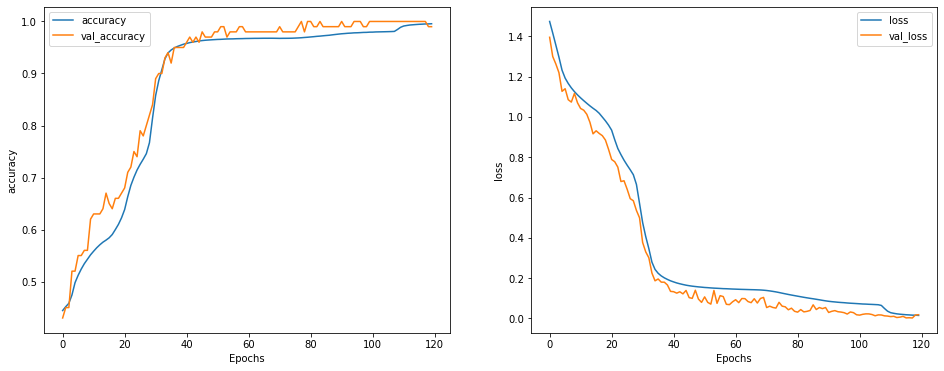

In [20]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.subplot(1,2,2)
plot_graphs(history, 'loss')

### Test the model with a new test set (1 million instances)

In [32]:
large_test_set = []
for i in range(1000000):
    New_deck = utils.init_standard_deck()
    chosen_cards, remained_cards = utils.get_random_cards(New_deck, 7)
    large_test_set.append(utils.Card_Rank(chosen_cards))
    
card_str_list = []
catgory_list = []

for row in large_test_set:
    card_str_list.append(row[4])
    catgory_list.append(row[0])

depth = 9
catgory_list = tf.one_hot(catgory_list, depth)

string_of_cards = []
for row in card_str_list:
    string_of_cards.append(row[0] + ' ' + row[1] + ' ' +row[2] + ' ' +row[3] + ' ' +row[4] + ' ' +row[5] + ' ' +row[6])
    
large_dataset_test = tf.data.Dataset.from_tensor_slices((string_of_cards, catgory_list))

In [33]:
large_dataset_test = large_dataset_test.shuffle(1).batch(1).prefetch(tf.data.experimental.AUTOTUNE)

In [34]:
test_loss, test_acc = model.evaluate(large_dataset_test)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

1000000/1000000 [==============================] - 852s 852us/step - loss: 0.0158 - accuracy: 0.9956
Test Loss: 0.0157890897244215
Test Accuracy: 0.9955710172653198
